In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
d2015 = pd.read_csv('source2/2015byHourFWIXFFMCFireHour.csv')
d2022 = pd.read_csv('source2/2019byHourFWIXFFMCFireHour.csv')
d2019 = pd.read_csv('source2/2022byHourFWIXFFMCFireHour.csv')

d2015 = d2015.drop(['latitude','longitude','altitude', 'hourly.is_day'], axis=1)
d2019 = d2019.drop(['latitude','longitude','altitude', 'hourly.is_day'], axis=1)
d2022 = d2022.drop(['latitude','longitude','altitude', 'hourly.is_day'], axis=1)

d2015 = d2015.drop(['hourly.snowfall', 'hourly.snow_depth'], axis=1)
d2019 = d2019.drop(['hourly.snowfall', 'hourly.snow_depth'], axis=1)
d2022 = d2022.drop(['hourly.snowfall', 'hourly.snow_depth'], axis=1)

In [ ]:
days = 1
tail = (24*days)+1
last_2022 = d2022.tail(tail)
last_2019 = d2019.tail(tail)
last_2015 = d2015.tail(tail)
year = 2015


df_numeric = last_2015.select_dtypes(include=[np.number])

cols = df_numeric.columns

corr = df_numeric.corr()

sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(40, 26))
hm = sns.heatmap(corr, annot=True, square=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)

plt.savefig(f'{days}_{year}_correlation_chart.png')

plt.show()

In [87]:
from scipy.stats import zscore

def detect_anomalies(df, variables, threshold=3):
    df_numeric = df[variables]
    z_scores = np.abs(zscore(df_numeric))
    anomalies = df[(z_scores > threshold).all(axis=1)] 
    
    return anomalies

#variables = ['hourly.temperature_2m']

numeric_columns = d2022.select_dtypes(include=[np.number]).columns.tolist()

for i in numeric_columns:
    variables = [i]

    #anomalies2015 = detect_anomalies(d2015, variables, threshold=-2)
    #anomalies2019 = detect_anomalies(d2019, variables, threshold=2)
    anomalies2022 = detect_anomalies(d2022, variables, threshold=-2)

    anomalies2022['hourly.time'] = pd.to_datetime(anomalies2022['hourly.time'])
    anomalies2022 = anomalies2022[anomalies2022['hourly.time'].between('2015-09-27T16:00', '2015-09-29T16:00')]

    if not anomalies2022.empty:
        print("Anomalies in 2019 data for variable", i, ":\n", anomalies2022['hourly.time'])
        print("Number of anomalies:", len(anomalies2022))

#print("Anomalies in 2015 data:\n", anomalies2015['hourly.time'], print(len(anomalies2015)))

/tmp/ipykernel_26593/2395097151.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies2022['hourly.time'] = pd.to_datetime(anomalies2022['hourly.time'])
/tmp/ipykernel_26593/2395097151.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies2022['hourly.time'] = pd.to_datetime(anomalies2022['hourly.time'])
/tmp/ipykernel_26593/2395097151.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

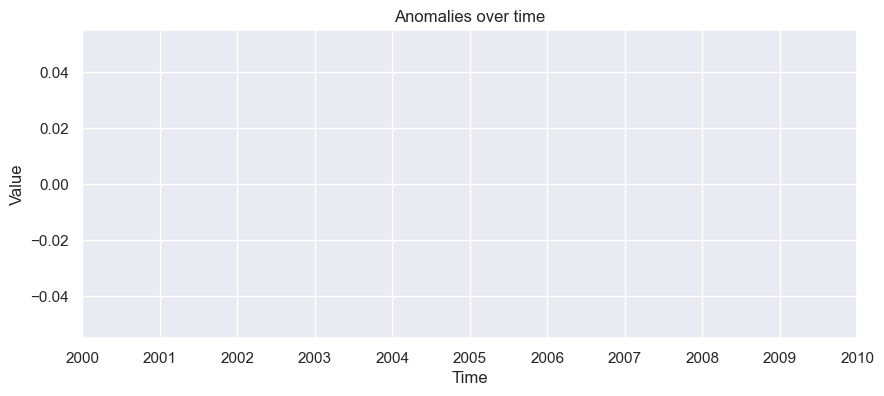

In [47]:
import matplotlib.pyplot as plt

def plot_anomalies(df, anomalies, variables):
    # Convert 'hourly.time' to datetime
    df['hourly.time'] = pd.to_datetime(df['hourly.time'])
    anomalies['hourly.time'] = pd.to_datetime(anomalies['hourly.time'])
    
    plt.figure(figsize=(10, 4))
    
    # Check if all variables are anomalies
    anomalies['all_anomalies'] = anomalies[variables].all(axis=1)
    
    # Plot only when all variables are anomalies
    x_anomalies = anomalies.loc[anomalies['all_anomalies'], 'hourly.time']
    y_anomalies = anomalies.loc[anomalies['all_anomalies'], variables].mean(axis=1)
    plt.scatter(x_anomalies, y_anomalies, color='red')
        
    plt.title("Anomalies over time")
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

variables = ['hourly.temperature_2m', 'hourly.relative_humidity_2m', 'hourly.dew_point_2m']
anomalies2015['hourly.time'] = d2015['hourly.time'].copy()
plot_anomalies(d2015, anomalies2015, variables)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_anomalies(df):
    df_numeric = df.select_dtypes(include=[np.number])  # select only numeric columns
    z_scores = np.abs(zscore(df_numeric))
    anomalies = df_numeric[(z_scores > 3).any(axis=1)]
    
    # Create a box plot for each column
    for column in anomalies.columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=anomalies[column])
        plt.title(f"Box plot of {column}")
        plt.show()

plot_anomalies(d2015)
#plot_anomalies(d2019)
#plot_anomalies(d2022)

In [ ]:
quinze_2022 = d2022.tail((24*15)+1)
tres_2022 = d2022.tail((24*3)+1)
dois_dias = d2022.tail((24*2)+1)
um_dia = d2022.tail((24*1)+1)


#df_numeric15 = quinze_2022.select_dtypes(include=[np.number])
#df_numeric3 = tres_2022.select_dtypes(include=[np.number])

df_numeric15 = dois_dias.select_dtypes(include=[np.number])
df_numeric3 = um_dia.select_dtypes(include=[np.number])

cols = df_numeric.columns

corr15 = df_numeric15.corr()
corr3 = df_numeric3.corr()

corr15 = corr15.reindex(index=corr3.columns, columns=corr3.columns)

corr_diff = corr3 - corr15

sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(40, 26))
hm = sns.heatmap(corr_diff, annot=True, square=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 15}, yticklabels=corr_diff.columns.values, xticklabels=corr_diff.columns.values)

plt.savefig(f'1days_2days_DIFFcorrelation_chart.png')

plt.show()